In [1]:
import os
import tensorflow as tf
import numpy as np
import itertools
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix


In [2]:
input_label = []
output_label = []
label = []

In [3]:
ficheiro = open("..\\15-02-2018(Time).csv", "r")

ficheiro.readline()
ficheiro.readline()
ficheiro.readline()

countLinha = 0
linha = ficheiro.readline()
while(linha != ""):
#for i in range(10000):
    linha = linha.split(",")
    linha.append(datetime.strptime(linha.pop(len(linha) - 1) + "", '%d/%m/%Y %H:%M:%S\n\n').time())
    label.append(linha)
    countLinha += 1
    linha = ficheiro.readline()
ficheiro.close()

In [4]:
label.sort(key = lambda array : array[len(array) - 1])

In [5]:
for i in range(len(label)):
    label[i].pop(len(label[i]) - 1)

In [6]:
print(label[10])

['445.0', '6.0', '276436.0', '3.0', '1.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '14.4698953827', '92145.3333333333', '159133.703734732', '275897.0', '98.0', '276436.0', '138218.0', '194846.101983078', '275995.0', '441.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0', '0', '0', '0', '72.0', '32.0', '10.852421537', '3.6174738457', '0.0', '0.0', '0.0', '0.0', '0.0', '0', '0', '0', '1', '0', '0', '0', '0', '0.0', '0.0', '0.0', '0.0', '0', '0', '0', '0', '0', '0', '3.0', '0.0', '1.0', '0.0', '8192.0', '8192.0', '0.0', '20.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', 'Benign']


In [7]:
b = 0
a = 0
for i in range(len(label)):
    out = label[i].pop(len(label[i]) - 1)
    if(out == "Benign"):
        out = 0
        b += 1
    else:
        out = 1
        a += 1
    output_label.append(out)
    input_label.append(label[i])

In [8]:
print(str(a) + " " + str(b))

52498 988050


In [9]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(input_label)
input_label = scaler.transform(input_label)

In [10]:
inp_train, inp_test, out_train, out_test = train_test_split(input_label, output_label, test_size = 0.2, shuffle = False)

In [11]:
inp_train = np.array(inp_train).reshape(len(inp_train), 78,1)
out_train = np.array(out_train).reshape(len(out_train),1)
inp_test = np.array(inp_test).reshape(len(inp_test), 78,1)
out_test = np.array(out_test).reshape(len(out_test),1)

In [23]:
model = keras.models.load_model('DosNet(15-02-2018).h5')

In [24]:
res = [np.argmax(resu) for resu in model.predict(inp_test)]

In [25]:
cm = confusion_matrix(y_true = out_test.reshape(len(out_test)), y_pred = np.array(res))

In [26]:
def plot_confusion_matrix(cm, classes, normaliza = False, title = "Confusion matrix", cmap = plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normaliza:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
    
    print(cm)
    
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
        horizontalalignment="center",
        color="white" if cm[i,j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[201295     63]
 [  4016   2736]]


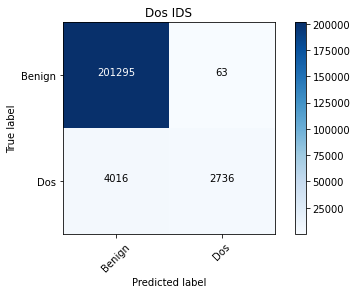

In [27]:
labels = ["Benign", "Dos"]
plot_confusion_matrix(cm = cm, classes = labels, title = "Dos IDS")